<img src="images/usm.jpg" width="480" height="240" align="left"/>

# MAT281 - Laboratorio N°10

## Objetivos del laboratorio

* Reforzar conceptos básicos de reducción de dimensionalidad.

## Contenidos

* [Problema 01](#p1)


<a id='p1'></a>
## I.- Problema 01


<img src="https://www.goodnewsnetwork.org/wp-content/uploads/2019/07/immunotherapy-vaccine-attacks-cancer-cells-immune-blood-Fotolia_purchased.jpg" width="360" height="360" align="center"/>


El **cáncer de mama**  es una proliferación maligna de las células epiteliales que revisten los conductos o lobulillos mamarios. Es una enfermedad clonal; donde una célula individual producto de una serie de mutaciones somáticas o de línea germinal adquiere la capacidad de dividirse sin control ni orden, haciendo que se reproduzca hasta formar un tumor. El tumor resultante, que comienza como anomalía leve, pasa a ser grave, invade tejidos vecinos y, finalmente, se propaga a otras partes del cuerpo.

El conjunto de datos se denomina `BC.csv`, el cual contine la información de distintos pacientes con tumosres (benignos o malignos) y algunas características del mismo.


Las características se calculan a partir de una imagen digitalizada de un aspirado con aguja fina (FNA) de una masa mamaria. Describen las características de los núcleos celulares presentes en la imagen.
Los detalles se puede encontrar en [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].


Lo primero será cargar el conjunto de datos:

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","BC.csv"), sep=",")
df['diagnosis'] = df['diagnosis'] .replace({'M':1,'B':0})
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Basado en la información presentada responda las siguientes preguntas:


1. Normalizar para las columnas numéricas con procesamiento **StandardScaler**.
2. Realice un gráfico de correlación. Identifique la existencia de colinealidad.
3. Realizar un ajuste PCA con **n_components = 10**. Realice un gráfico de la varianza y varianza acumulada. Interprete.
4. Devuelva un dataframe con las componentes principales.
5. Aplique al menos tres modelos de clasificación. Para cada modelo, calule el valor de sus métricas.

## Problema 1

In [3]:
target = df['diagnosis']
df = df.drop(['id', 'diagnosis'], axis = 1) #id se dropea ya que a mi criterio no aporta información al problema
x = StandardScaler().fit_transform(df)

In [4]:
df_normal = pd.DataFrame(x,columns = df.columns)
df_normal

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


## Problema 2

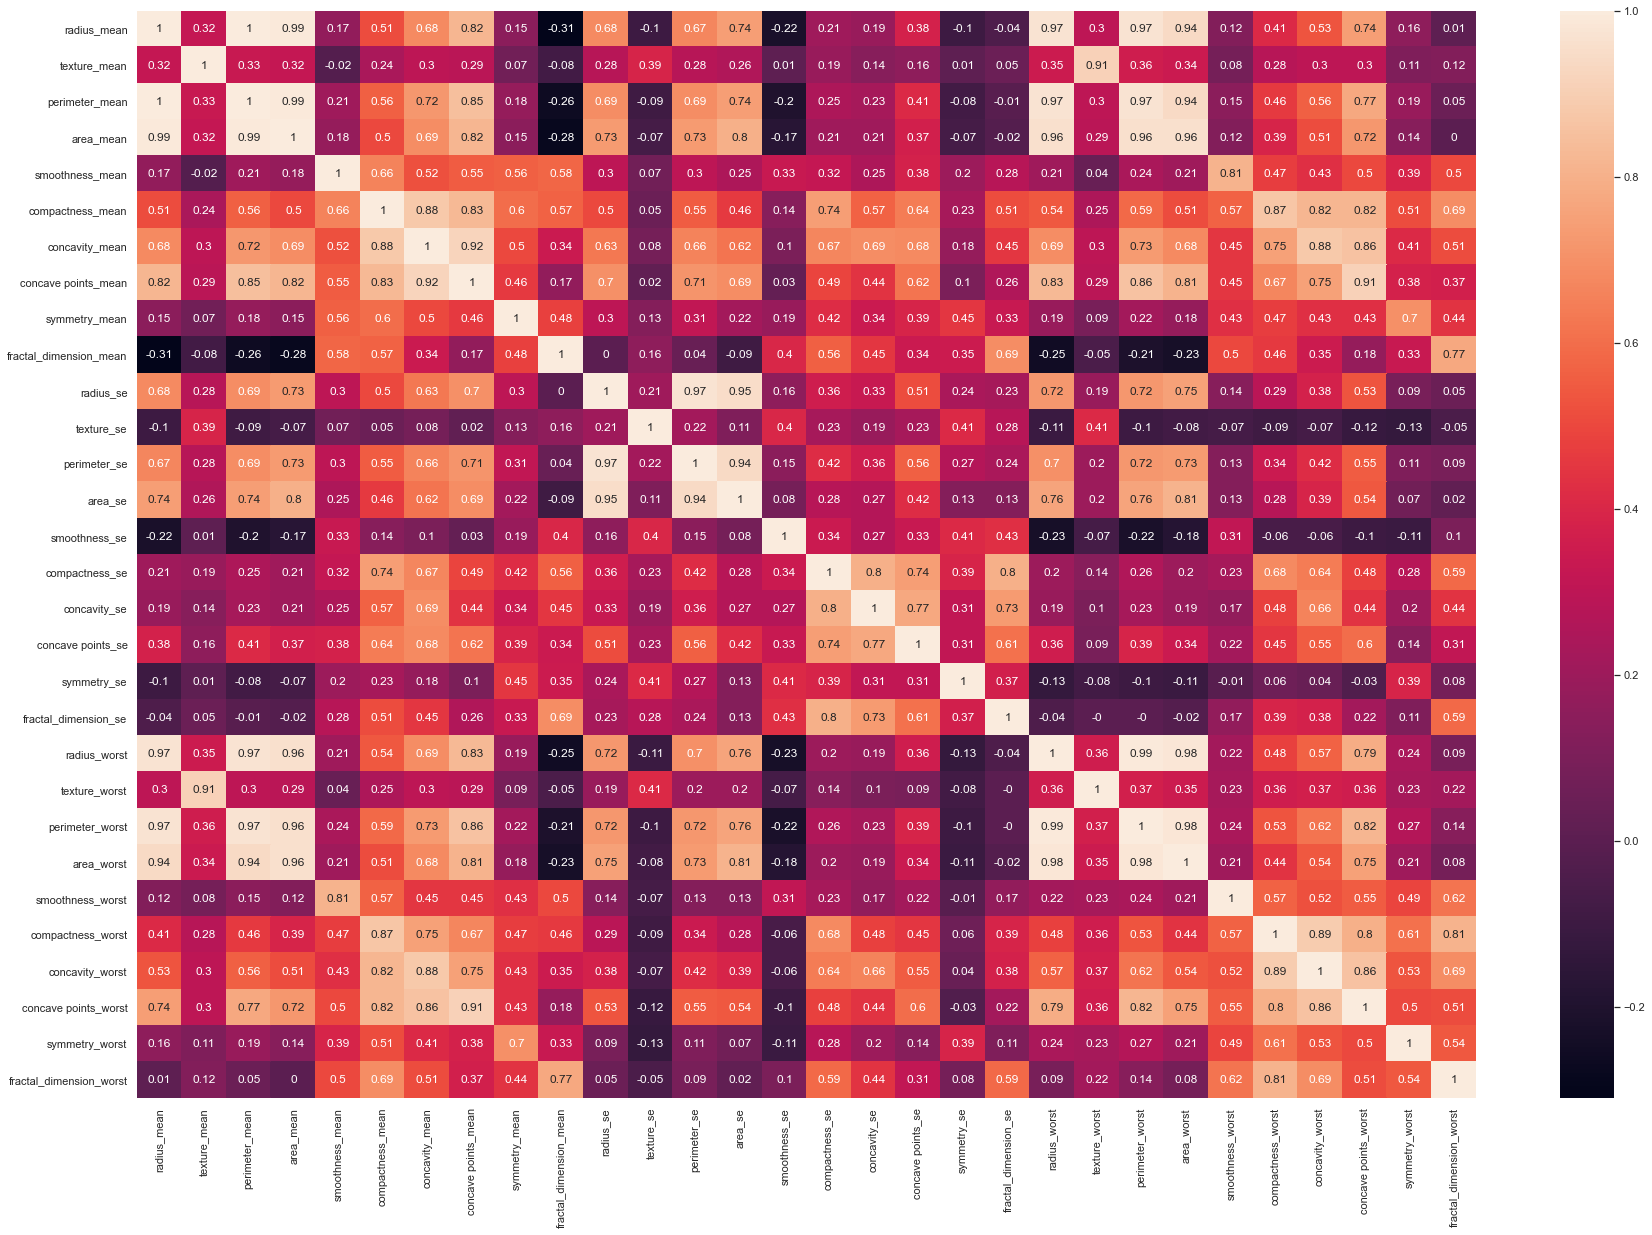

In [5]:
figure = plt.figure(figsize=(30,20))
sns.heatmap(df_normal.corr().round(2), annot = True, fmt="g")
plt.show()

Notar que existe colinealidad. Esto se aprecia en aquellas secciones que tienen un índice cercano a 1 (color blanco) que de hecho no son tantas como se podría pensar ya que en el heatmap, por el hecho de graficar a "todos con todos" existe un efecto espejo entre los datos asi que basta con fijarse los que estan bajo la diagonal.

## Problema 3

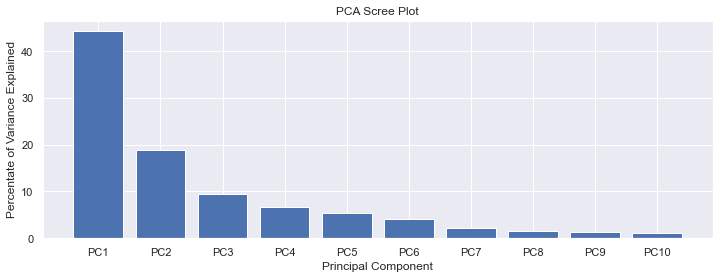

In [6]:
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(df_normal.values)

# graficar varianza por componente
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10']

plt.figure(figsize=(12,4))
plt.bar(x= range(1,11), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

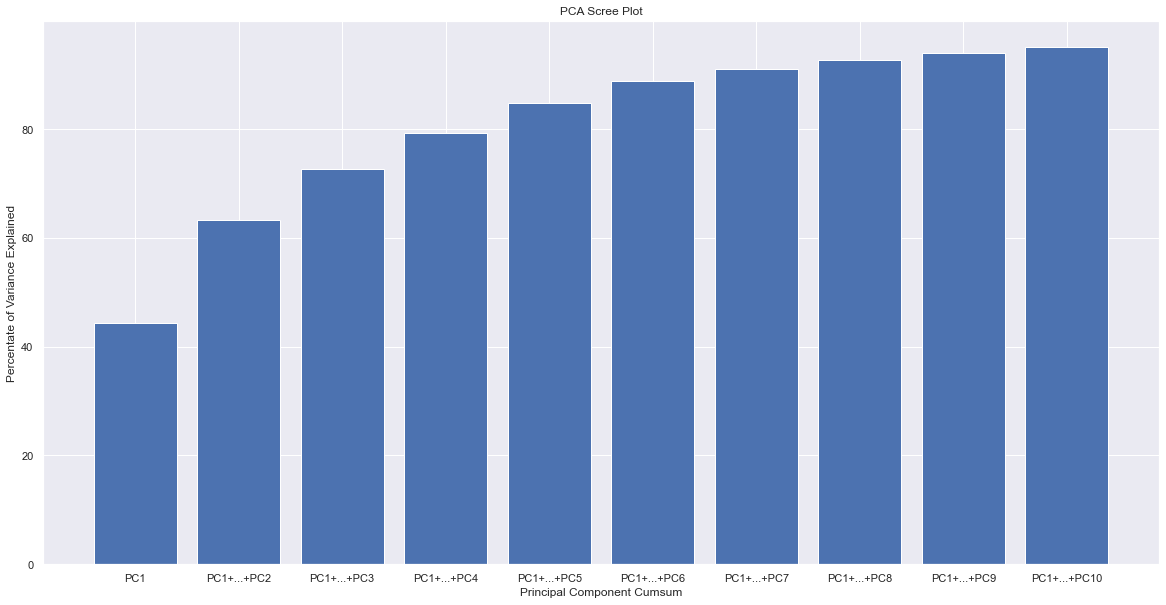

In [19]:
# graficar varianza por la suma acumulada de los componente
percent_variance_cum = np.cumsum(percent_variance)
columns = []
for i in range(1, 11):
  if i == 1:
    columns.append(f'PC{i}')
  else:
    columns.append(columns[0] + f'+...+PC{i}')
columns

plt.figure(figsize=(20,10))
plt.bar(x= range(1,11), height=percent_variance_cum, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component Cumsum')
plt.title('PCA Scree Plot')
plt.show()

PCA lo que hace es caracterizar la varianza de los componentes principales, esto es debido a que en nuestro caso no tiene sentido estudiar 32 columnas ya que claramente como se vió en el heatmap son muy pocas las variables que tienen correlación y es por esto que PCA escoge las variables con mejor índice de correlación, en nuestro caso son 10.

En el primer gráfico la barra mas grande es aquella que posee mayor varianza con respecto a las demas y por lo tanto es aquella que tiene menor correlación de los componentes principales. Por lo tanto el caso de PC8 o PC7 en adelante, son los componentes que estan mejor correlacionados.

En el caso del segundo gráfico notemos que las últimas 3 barras estan en una altura similar y es debido a que los últimos componenetes principales tienen varianza pequeña lo que da sentido a que las últimas barras del acumulado sean similares ya que suman poco.

## Problema 4

In [8]:
principalDataframe = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])
principalDataframe

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159371,-0.398408,-0.157108,-0.877392
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240987,-0.711910,1.106991
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097371,0.024062,0.454269
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059559,-1.405452,-1.116990
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636378,-0.263806,0.377705
...,...,...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375193,-0.596130,-0.035469,0.987918,0.256978
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246710,-0.716327,-1.113359,-0.105212,-0.108636
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192758,0.341886,0.393918,0.520878
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567936,0.223082,-0.280239,-0.542031,-0.089295


## Problema 5

In [14]:
#Definición de las métricas

import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

#Función entregada en labs anteriores para determinar la métricas
def summary_metrics(y_test,y_pred):
   
    # metrics

    print('\nMatriz de confusion:\n ')
    print(confusion_matrix(y_test,y_pred))

    print('\nMetricas:\n ')
    print('accuracy:   ',accuracy_score(y_test, y_pred))
    print('recall:     ',recall_score(y_test, y_pred))
    print('precision:  ',precision_score(y_test, y_pred))
    print('f-score:    ',f1_score(y_test, y_pred))
    print("")


    return 

In [10]:
#Entrenamiento del modelo
from sklearn.model_selection import train_test_split

x_train, x_eval, y_train, y_eval = train_test_split(principalDataframe, target, test_size=0.35, 
                                                    train_size=0.65,
                                                    random_state=1982)

In [11]:
#Modelo de Regresión logística
from sklearn.linear_model import LogisticRegression


# Creando el modelo
lr = LogisticRegression(solver='liblinear').fit(x_train, y_train)
 
# predecir
lr_pred = lr.predict(x_eval)

summary_metrics(y_eval, lr_pred)


Matriz de confusion:
 
[[112   4]
 [  4  80]]

Metricas:
 
accuracy:    0.96
recall:      0.9523809523809523
precision:   0.9523809523809523
f-score:     0.9523809523809523



In [12]:
#Modelo de Arbol de clasificación
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)
dt_pred = model.predict(x_eval)

summary_metrics(y_eval, dt_pred)


Matriz de confusion:
 
[[106  10]
 [ 12  72]]

Metricas:
 
accuracy:    0.89
recall:      0.8571428571428571
precision:   0.8780487804878049
f-score:     0.8674698795180722



In [13]:
#Modelo SVC

from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(x_train, y_train)
svc_pred = svc_model.predict(x_eval)

summary_metrics(y_eval, svc_pred)


Matriz de confusion:
 
[[114   2]
 [  6  78]]

Metricas:
 
accuracy:    0.96
recall:      0.9285714285714286
precision:   0.975
f-score:     0.951219512195122

